# Project machine learning INFO-F422

Link of presentation video on youtube

https://youtu.be/KS-3uwn4WZE

## Load the used libraries

In [1]:
# Package ggplot2
if (!require("ggplot2", character.only = TRUE)) {
  install.packages("ggplot2", dependencies = TRUE)
  library("ggplot2", character.only = TRUE)
}

# Package corrplot
if (!require("corrplot", character.only = TRUE)) {
  install.packages("corrplot", dependencies = TRUE)
  library("corrplot", character.only = TRUE)
}

# Package crossval
if (!require("crossval", character.only = TRUE)) {
  install.packages("crossval", dependencies = TRUE)
  library("crossval", character.only = TRUE)
}

# Package randomForest
if (!require("randomForest", character.only = TRUE)) {
  install.packages("randomForest", dependencies = TRUE)
  library("randomForest", character.only = TRUE)
}

# Package keras
if (!require("keras", character.only = TRUE)) {
  install.packages("keras", dependencies = TRUE)
  library("keras", character.only = TRUE)
}

# Package xgboost
if (!require("xgboost", character.only = TRUE)) {
  install.packages("xgboost", dependencies = TRUE)
  library("xgboost", character.only = TRUE)
}

# Package lazy
if (!require("lazy", character.only = TRUE)) {
  install.packages("lazy", dependencies = TRUE)
  library("lazy", character.only = TRUE)
}


Loading required package: ggplot2

Loading required package: corrplot

corrplot 0.92 loaded

Loading required package: crossval

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘crossval’”
Installing package into ‘/home/plouis/R/x86_64-pc-linux-gnu-library/4.4’
(as ‘lib’ is unspecified)

also installing the dependencies ‘entropy’, ‘corpcor’, ‘fdrtool’, ‘sda’, ‘care’, ‘binda’


Loading required package: randomForest

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: keras

Loading required package: xgboost

Loading required package: lazy



In [2]:
library(ggplot2)
library(corrplot)
library(crossval)

# Model libraries
library(randomForest)
library(keras)
library(xgboost)
library(lazy)

set.seed(1)

### Load and preprocessing Data from csv file

First, we load the two datasets by reading csv files

In [2]:
# Load the data from csv files, and store them in dataframes
data <- read.csv("data/Train.csv")
data_test <- read.csv("data/Test.csv")
data_test_copy <- read.csv("data/Test.csv")

Let's observe the number of columns and rows.

In [3]:
# Display the number of rows and columns
dim(data)

[1] 30557    82

Let's observe the data type of each column. We want only numerical data for our models.

In [4]:
# Check the data types of the columns
sapply(data[1,],class)

Place_ID.X.Date 
                                        "character" 
                                               Date 
                                        "character" 
                                           Place_ID 
                                        "character" 
                                             target 
                                          "numeric" 
                                         target_min 
                                          "numeric" 
                                         target_max 
                                          "numeric" 
                                    target_variance 
                                          "numeric" 
                                       target_count 
                                          "integer" 
               precipitable_water_entire_atmosphere 
                                          "numeric" 
                  relative_humidity_2m_above_ground 
                                          "numeric" 
                  specific_humidity_2m_above_ground 
                                          "numeric" 
                        temperature_2m_above_ground 
                                          "numeric" 
               u_component_of_wind_10m_above_ground 
                                          "numeric" 
               v_component_of_wind_10m_above_ground 
                                          "numeric" 
                   L3_NO2_NO2_column_number_density 
                                          "numeric" 
             L3_NO2_NO2_slant_column_number_density 
                                          "numeric" 
                     L3_NO2_absorbing_aerosol_index 
                                          "numeric" 
                              L3_NO2_cloud_fraction 
                                          "numeric" 
                             L3_NO2_sensor_altitude 
                                          "numeric" 
                        L3_NO2_sensor_azimuth_angle 
                                          "numeric" 
                         L3_NO2_sensor_zenith_angle 
                                          "numeric" 
                         L3_NO2_solar_azimuth_angle 
                                          "numeric" 
                          L3_NO2_solar_zenith_angle 
                                          "numeric" 
     L3_NO2_stratospheric_NO2_column_number_density 
                                          "numeric" 
                         L3_NO2_tropopause_pressure 
                                          "numeric" 
      L3_NO2_tropospheric_NO2_column_number_density 
                                          "numeric" 
                     L3_O3_O3_column_number_density 
                                          "numeric" 
                     L3_O3_O3_effective_temperature 
                                          "numeric" 
                               L3_O3_cloud_fraction 
                                          "numeric" 
                         L3_O3_sensor_azimuth_angle 
                                          "numeric" 
                          L3_O3_sensor_zenith_angle 
                                          "numeric" 
                          L3_O3_solar_azimuth_angle 
                                          "numeric" 
                           L3_O3_solar_zenith_angle 
                                          "numeric" 
                     L3_CO_CO_column_number_density 
                                          "numeric" 
                    L3_CO_H2O_column_number_density 
                                          "numeric" 
                                 L3_CO_cloud_height 
                                          "numeric" 
                              L3_CO_sensor_altitude 
                                          "numeric" 
                         L3_CO_sensor_azimuth_angle 
                                          "numeric" 
        

Let's discard the useless columns (columns linked to the target). After this operation, only the "Date" column will still contain character data. All other columns contain only numeric data.

In [5]:
# Remove the features link to the target
data <- subset(data,select = -c(Place_ID.X.Date,Place_ID,target_min,target_max,target_variance,target_count))
data[1:5,]

,Date,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,⋯,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-01-02,38,11.000000,60.2,0.00804,18.51684,1.996377,-1.227395,7.383038e-05,0.0001558203,⋯,38.5930174,-61.75259,22.36366,1793.794,3227.855,0.01057904,74.48105,37.50150,-62.14264,22.54512
2,2020-01-03,39,14.600000,48.8,0.00839,22.54653,3.330430,-1.188108,7.603261e-05,0.0001968663,⋯,59.6249116,-67.69351,28.61480,1789.960,3384.227,0.01510438,75.63004,55.65749,-53.86813,19.29365
3,2020-01-04,24,16.400000,33.4,0.00750,27.03103,5.065727,3.500559,6.660776e-05,0.0001704180,⋯,49.8397137,-78.34270,34.29698,NA,NA,NA,NA,NA,NA,NA
4,2020-01-05,49,6.911948,21.3,0.00391,23.97186,3.004001,1.099468,8.258178e-05,0.0001748593,⋯,29.1812580,-73.89659,30.54545,NA,NA,NA,NA,NA,NA,NA
5,2020-01-06,21,13.900001,44.7,0.00535,16.81631,2.621787,2.670559,7.038484e-05,0.0001415511,⋯,0.7972941,-68.61248,26.89969,NA,NA,NA,NA,NA,NA,NA


The feature "Date" is the last feature that not contains numeric data. It can provide useful information, but we can not use them like that. So, we will separate the "Date" in 3 new features: "year", "month" and "day".

In [6]:
#Define the function to parse the date
label_date <- function(row) {
    date_ <- scan(text=row[1], sep="-")
    return(date_)
}

date_values <- t(apply(data, 1, label_date))

data$year <- date_values[, 1]
data$month <- date_values[, 2]
data$day <- date_values[, 3]

colnames(data)
data[1:5, ]


[1] "Date"                                               
 [2] "target"                                             
 [3] "precipitable_water_entire_atmosphere"               
 [4] "relative_humidity_2m_above_ground"                  
 [5] "specific_humidity_2m_above_ground"                  
 [6] "temperature_2m_above_ground"                        
 [7] "u_component_of_wind_10m_above_ground"               
 [8] "v_component_of_wind_10m_above_ground"               
 [9] "L3_NO2_NO2_column_number_density"                   
[10] "L3_NO2_NO2_slant_column_number_density"             
[11] "L3_NO2_absorbing_aerosol_index"                     
[12] "L3_NO2_cloud_fraction"                              
[13] "L3_NO2_sensor_altitude"                             
[14] "L3_NO2_sensor_azimuth_angle"                        
[15] "L3_NO2_sensor_zenith_angle"                         
[16] "L3_NO2_solar_azimuth_angle"                         
[17] "L3_NO2_solar_zenith_angle"                          
[18] "L3_NO2_stratospheric_NO2_column_number_density"     
[19] "L3_NO2_tropopause_pressure"                         
[20] "L3_NO2_tropospheric_NO2_column_number_density"      
[21] "L3_O3_O3_column_number_density"                     
[22] "L3_O3_O3_effective_temperature"                     
[23] "L3_O3_cloud_fraction"                               
[24] "L3_O3_sensor_azimuth_angle"                         
[25] "L3_O3_sensor_zenith_angle"                          
[26] "L3_O3_solar_azimuth_angle"                          
[27] "L3_O3_solar_zenith_angle"                           
[28] "L3_CO_CO_column_number_density"                     
[29] "L3_CO_H2O_column_number_density"                    
[30] "L3_CO_cloud_height"                                 
[31] "L3_CO_sensor_altitude"                              
[32] "L3_CO_sensor_azimuth_angle"                         
[33] "L3_CO_sensor_zenith_angle"                          
[34] "L3_CO_solar_azimuth_angle"                          
[35] "L3_CO_solar_zenith_angle"                           
[36] "L3_HCHO_HCHO_slant_column_number_density"           
[37] "L3_HCHO_cloud_fraction"                             
[38] "L3_HCHO_sensor_azimuth_angle"                       
[39] "L3_HCHO_sensor_zenith_angle"                        
[40] "L3_HCHO_solar_azimuth_angle"                        
[41] "L3_HCHO_solar_zenith_angle"                         
[42] "L3_HCHO_tropospheric_HCHO_column_number_density"    
[43] "L3_HCHO_tropospheric_HCHO_column_number_density_amf"
[44] "L3_CLOUD_cloud_base_height"                         
[45] "L3_CLOUD_cloud_base_pressure"                       
[46] "L3_CLOUD_cloud_fraction"                            
[47] "L3_CLOUD_cloud_optical_depth"                       
[48] "L3_CLOUD_cloud_top_height"                          
[49] "L3_CLOUD_cloud_top_pressure"                        
[50] "L3_CLOUD_sensor_azimuth_angle"                      
[51] "L3_CLOUD_sensor_zenith_angle"                       
[52] "L3_CLOUD_solar_azimuth_angle"                       
[53] "L3_CLOUD_solar_zenith_angle"                        
[54] "L3_CLOUD_surface_albedo"                            
[55] "L3_AER_AI_absorbing_aerosol_index"                  
[56] "L3_AER_AI_sensor_altitude"                          
[57] "L3_AER_AI_sensor_azimuth_angle"                     
[58] "L3_AER_AI_sensor_zenith_angle"                      
[59] "L3_AER_AI_solar_azimuth_angle"                      
[60] "L3_AER_AI_solar_zenith_angle"                       
[61] "L3_SO2_SO2_column_number_density"                   
[62] "L3_SO2_SO2_column_number_density_amf"               
[63] "L3_SO2_SO2_slant_column_number_density"             
[64] "L3_SO2_absorbing_aerosol_index"                     
[65] "L3_SO2_cloud_fraction"                              
[66] "L3_SO2_sensor_azimuth_angle"                        
[67] "L3_SO2_sensor_zenith_angle"                         
[68] "L3_SO2_solar_azimuth_angle"               

,Date,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,⋯,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle,year,month,day
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-01-02,38,11.000000,60.2,0.00804,18.51684,1.996377,-1.227395,7.383038e-05,0.0001558203,⋯,1793.794,3227.855,0.01057904,74.48105,37.50150,-62.14264,22.54512,2020,1,2
2,2020-01-03,39,14.600000,48.8,0.00839,22.54653,3.330430,-1.188108,7.603261e-05,0.0001968663,⋯,1789.960,3384.227,0.01510438,75.63004,55.65749,-53.86813,19.29365,2020,1,3
3,2020-01-04,24,16.400000,33.4,0.00750,27.03103,5.065727,3.500559,6.660776e-05,0.0001704180,⋯,NA,NA,NA,NA,NA,NA,NA,2020,1,4
4,2020-01-05,49,6.911948,21.3,0.00391,23.97186,3.004001,1.099468,8.258178e-05,0.0001748593,⋯,NA,NA,NA,NA,NA,NA,NA,2020,1,5
5,2020-01-06,21,13.900001,44.7,0.00535,16.81631,2.621787,2.670559,7.038484e-05,0.0001415511,⋯,NA,NA,NA,NA,NA,NA,NA,2020,1,6


Let's observe the standard deviation of thes 3 new features.

In [7]:
# Compute the standard deviation of the year, month and day
sd(data$year)
sd(data$month)
sd(data$day)

[1] 0

[1] 0.8990806

[1] 8.921199

As we can see, the year has a standard deviation at 0. So, there is no difference between all rows. Let's discard this feature. The "Date" is not useful anymore, so we can also discard them.

In [8]:
# Remove the date column
data <- subset(x=data, select=-c(Date,year))
# Visualize the transformed data
colnames(data)

[1] "target"                                             
 [2] "precipitable_water_entire_atmosphere"               
 [3] "relative_humidity_2m_above_ground"                  
 [4] "specific_humidity_2m_above_ground"                  
 [5] "temperature_2m_above_ground"                        
 [6] "u_component_of_wind_10m_above_ground"               
 [7] "v_component_of_wind_10m_above_ground"               
 [8] "L3_NO2_NO2_column_number_density"                   
 [9] "L3_NO2_NO2_slant_column_number_density"             
[10] "L3_NO2_absorbing_aerosol_index"                     
[11] "L3_NO2_cloud_fraction"                              
[12] "L3_NO2_sensor_altitude"                             
[13] "L3_NO2_sensor_azimuth_angle"                        
[14] "L3_NO2_sensor_zenith_angle"                         
[15] "L3_NO2_solar_azimuth_angle"                         
[16] "L3_NO2_solar_zenith_angle"                          
[17] "L3_NO2_stratospheric_NO2_column_number_density"     
[18] "L3_NO2_tropopause_pressure"                         
[19] "L3_NO2_tropospheric_NO2_column_number_density"      
[20] "L3_O3_O3_column_number_density"                     
[21] "L3_O3_O3_effective_temperature"                     
[22] "L3_O3_cloud_fraction"                               
[23] "L3_O3_sensor_azimuth_angle"                         
[24] "L3_O3_sensor_zenith_angle"                          
[25] "L3_O3_solar_azimuth_angle"                          
[26] "L3_O3_solar_zenith_angle"                           
[27] "L3_CO_CO_column_number_density"                     
[28] "L3_CO_H2O_column_number_density"                    
[29] "L3_CO_cloud_height"                                 
[30] "L3_CO_sensor_altitude"                              
[31] "L3_CO_sensor_azimuth_angle"                         
[32] "L3_CO_sensor_zenith_angle"                          
[33] "L3_CO_solar_azimuth_angle"                          
[34] "L3_CO_solar_zenith_angle"                           
[35] "L3_HCHO_HCHO_slant_column_number_density"           
[36] "L3_HCHO_cloud_fraction"                             
[37] "L3_HCHO_sensor_azimuth_angle"                       
[38] "L3_HCHO_sensor_zenith_angle"                        
[39] "L3_HCHO_solar_azimuth_angle"                        
[40] "L3_HCHO_solar_zenith_angle"                         
[41] "L3_HCHO_tropospheric_HCHO_column_number_density"    
[42] "L3_HCHO_tropospheric_HCHO_column_number_density_amf"
[43] "L3_CLOUD_cloud_base_height"                         
[44] "L3_CLOUD_cloud_base_pressure"                       
[45] "L3_CLOUD_cloud_fraction"                            
[46] "L3_CLOUD_cloud_optical_depth"                       
[47] "L3_CLOUD_cloud_top_height"                          
[48] "L3_CLOUD_cloud_top_pressure"                        
[49] "L3_CLOUD_sensor_azimuth_angle"                      
[50] "L3_CLOUD_sensor_zenith_angle"                       
[51] "L3_CLOUD_solar_azimuth_angle"                       
[52] "L3_CLOUD_solar_zenith_angle"                        
[53] "L3_CLOUD_surface_albedo"                            
[54] "L3_AER_AI_absorbing_aerosol_index"                  
[55] "L3_AER_AI_sensor_altitude"                          
[56] "L3_AER_AI_sensor_azimuth_angle"                     
[57] "L3_AER_AI_sensor_zenith_angle"                      
[58] "L3_AER_AI_solar_azimuth_angle"                      
[59] "L3_AER_AI_solar_zenith_angle"                       
[60] "L3_SO2_SO2_column_number_density"                   
[61] "L3_SO2_SO2_column_number_density_amf"               
[62] "L3_SO2_SO2_slant_column_number_density"             
[63] "L3_SO2_absorbing_aerosol_index"                     
[64] "L3_SO2_cloud_fraction"                              
[65] "L3_SO2_sensor_azimuth_angle"                        
[66] "L3_SO2_sensor_zenith_angle"                         
[67] "L3_SO2_solar_azimuth_angle"                         
[68] "L3_SO2_solar_zenith_angle"                

Let's observe the characteristics of each column.

In [9]:
# Summary of the data
summary(data)

     target       precipitable_water_entire_atmosphere
 Min.   :  1.00   Min.   : 0.420                      
 1st Qu.: 25.00   1st Qu.: 7.667                      
 Median : 50.00   Median :12.200                      
 Mean   : 61.15   Mean   :15.302                      
 3rd Qu.: 80.00   3rd Qu.:19.900                      
 Max.   :815.00   Max.   :72.600                      
                                                      
 relative_humidity_2m_above_ground specific_humidity_2m_above_ground
 Min.   :  5.129                   Min.   :0.0001392                
 1st Qu.: 58.600                   1st Qu.:0.0034027                
 Median : 74.100                   Median :0.0049121                
 Mean   : 70.553                   Mean   :0.0060044                
 3rd Qu.: 85.450                   3rd Qu.:0.0075617                
 Max.   :100.000                   Max.   :0.0216150                
                                                                    
 tempera

### Feature selection 

We can notice that all columns concerning the L3_CH4 data have a very high number of NA values (24765/30557). So, these columns provide too few information. Let's discard them.

In [10]:
data <- subset(data, select =-c(L3_CH4_solar_zenith_angle, L3_CH4_sensor_zenith_angle, L3_CH4_solar_azimuth_angle,
  L3_CH4_sensor_azimuth_angle,L3_CH4_aerosol_optical_depth,L3_CH4_aerosol_height, L3_CH4_CH4_column_volume_mixing_ratio_dry_air))

data[1:5,] # Check the first few rows of the data

,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,⋯,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,month,day
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,38,11.000000,60.2,0.00804,18.51684,1.996377,-1.227395,7.383038e-05,0.0001558203,-1.2313303,⋯,0.3125208,-4.046582e-05,-1.8614757,0.00000000,76.53643,38.5930174,-61.75259,22.36366,1,2
2,39,14.600000,48.8,0.00839,22.54653,3.330430,-1.188108,7.603261e-05,0.0001968663,-1.0825535,⋯,0.4339572,5.021103e-05,-1.4526119,0.05943286,-14.70804,59.6249116,-67.69351,28.61480,1,3
3,24,16.400000,33.4,0.00750,27.03103,5.065727,3.500559,6.660776e-05,0.0001704180,-1.0012421,⋯,0.3569246,5.294885e-05,-1.5729503,0.08206301,-105.20134,49.8397137,-78.34270,34.29698,1,4
4,49,6.911948,21.3,0.00391,23.97186,3.004001,1.099468,8.258178e-05,0.0001748593,-0.7770191,⋯,0.5845225,1.097052e-04,-1.2393168,0.12126134,-104.33407,29.1812580,-73.89659,30.54545,1,5
5,21,13.900001,44.7,0.00535,16.81631,2.621787,2.670559,7.038484e-05,0.0001415511,0.3663234,⋯,0.4080472,1.589104e-04,0.2024888,0.03791943,58.85018,0.7972941,-68.61248,26.89969,1,6


For the other columns, let's replace the NA values by the mean of each column.

In [11]:
#Define the function to replace the missing values with the mean value
replace_na_with_mean_value<-function(vec) {
    mean_vec<-mean(vec,na.rm=T)
    vec[is.na(vec)]<-mean_vec
    vec
}

# Apply it
data <- data.frame(apply(data, 2, replace_na_with_mean_value))

Some colums seem to have few differences between rows. Let's observe them more carefully.

[1] 9.039619e-05

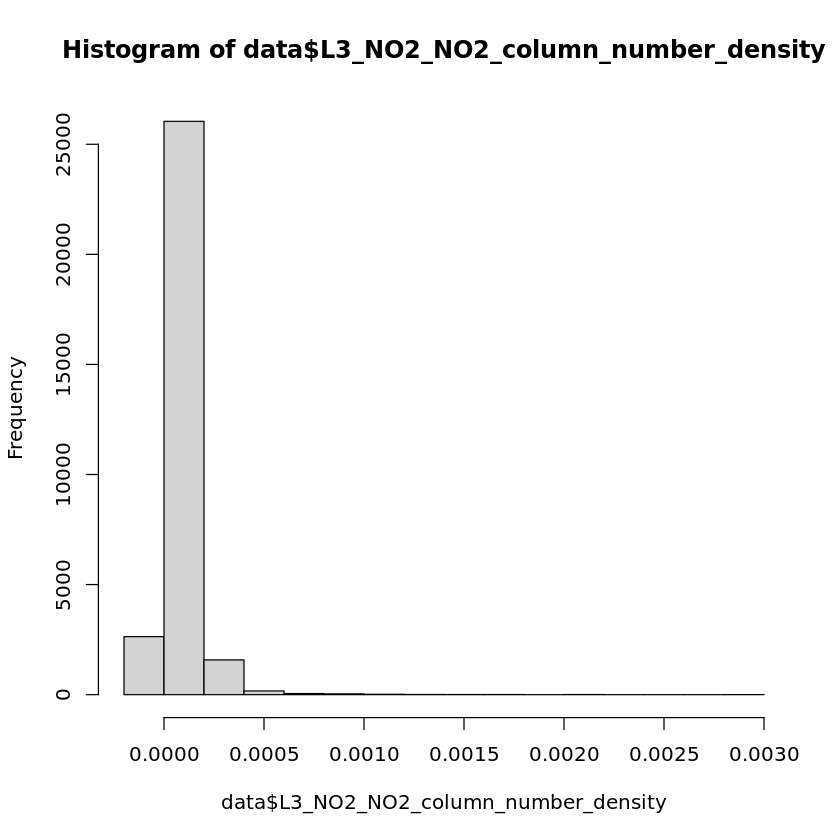

In [12]:
sd(data$L3_NO2_NO2_column_number_density)
hist(data$L3_NO2_NO2_column_number_density)

We can see that more than 25000 rows share the same value. This feature is therefore not really useful. Let's discard it.

In [13]:
data <- subset(data, select = -c(L3_NO2_NO2_column_number_density))

[1] 0.0001045641

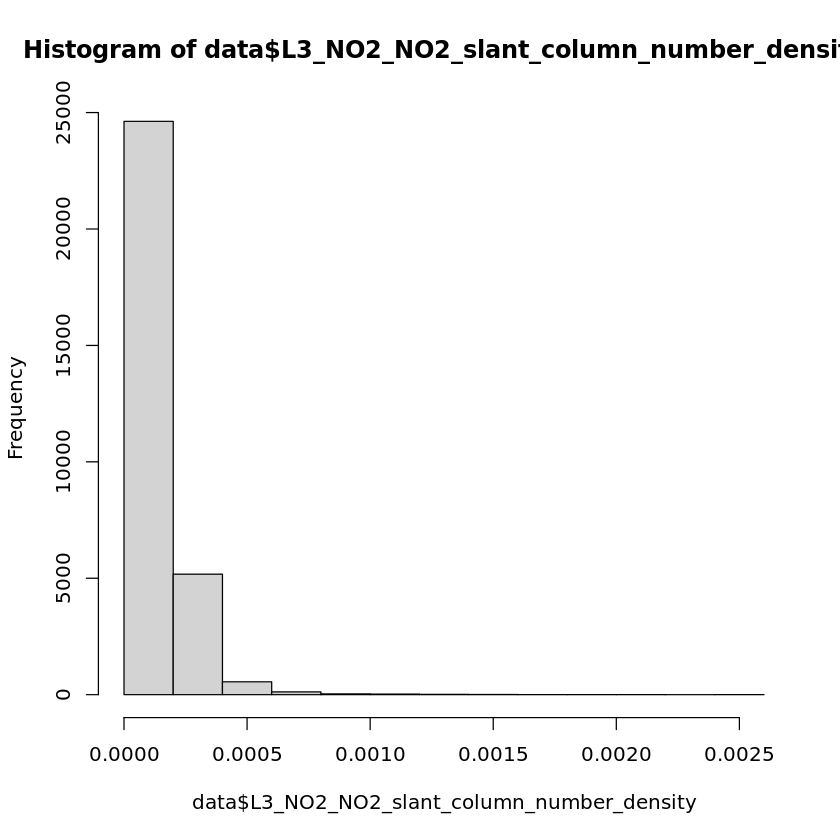

In [14]:
sd(data$L3_NO2_NO2_slant_column_number_density)
hist(data$L3_NO2_NO2_slant_column_number_density)

[1] 6.375158e-05

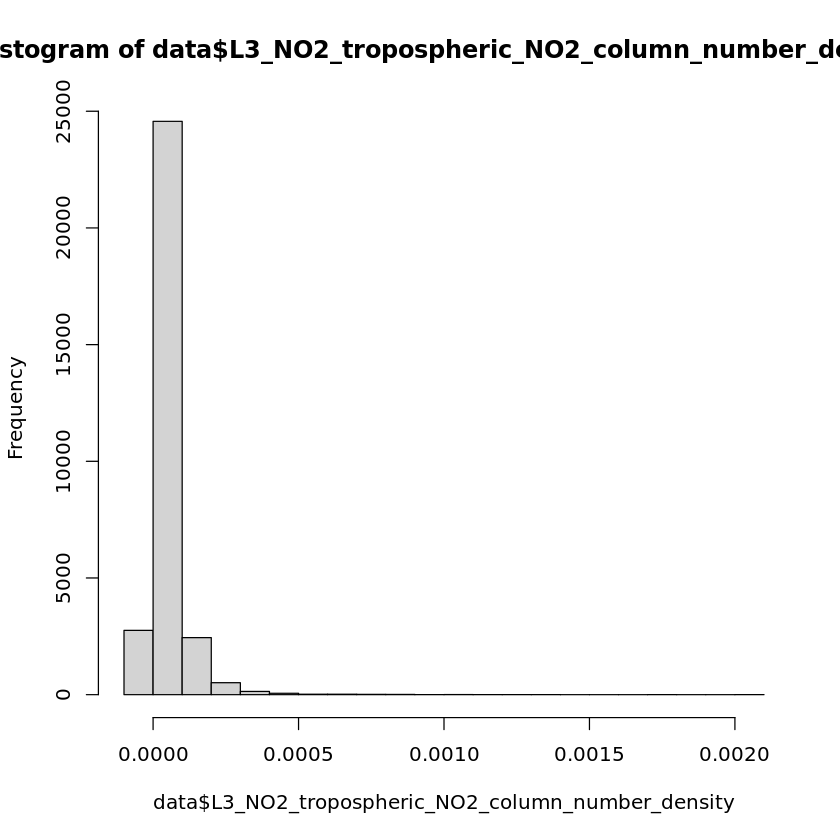

In [15]:
sd(data$L3_NO2_tropospheric_NO2_column_number_density)
hist(data$L3_NO2_tropospheric_NO2_column_number_density)

[1] 6.67342e-05

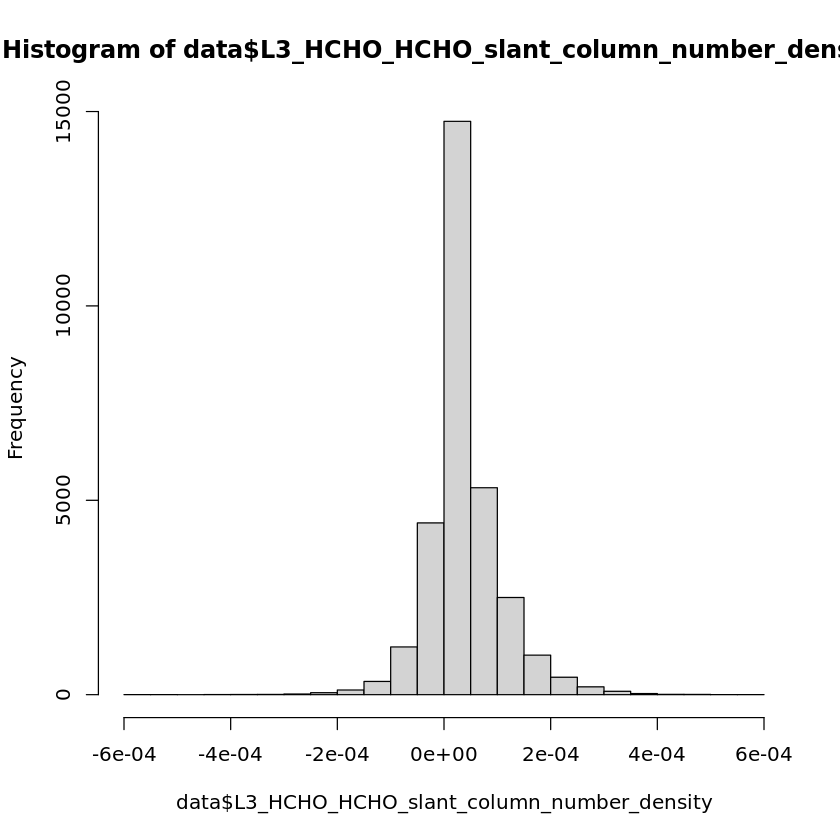

In [16]:
sd(data$L3_HCHO_HCHO_slant_column_number_density)
hist(data$L3_HCHO_HCHO_slant_column_number_density)

[1] 8.177916e-05

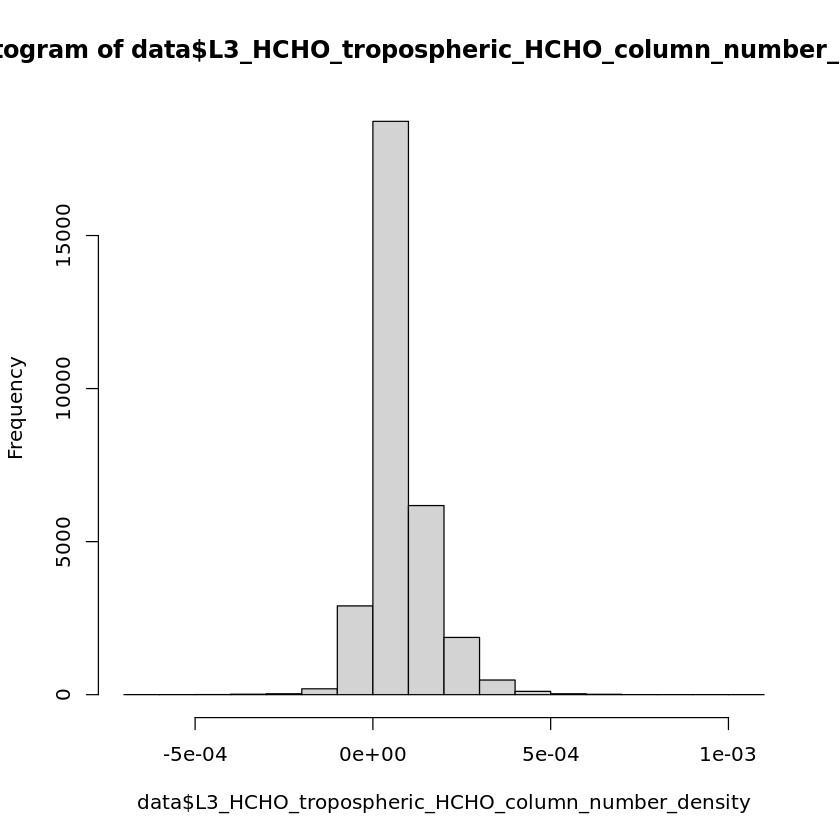

In [17]:
sd(data$L3_HCHO_tropospheric_HCHO_column_number_density)
hist(data$L3_HCHO_tropospheric_HCHO_column_number_density)

[1] 0.0007856048

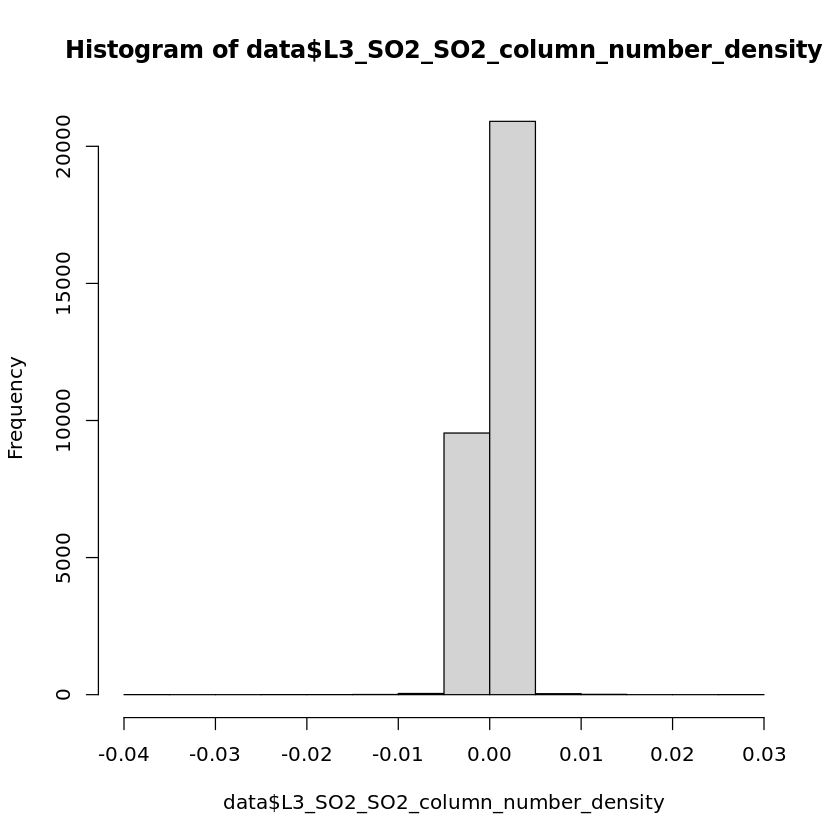

In [18]:
sd(data$L3_SO2_SO2_column_number_density)
hist(data$L3_SO2_SO2_column_number_density)

[1] 0.0001460595

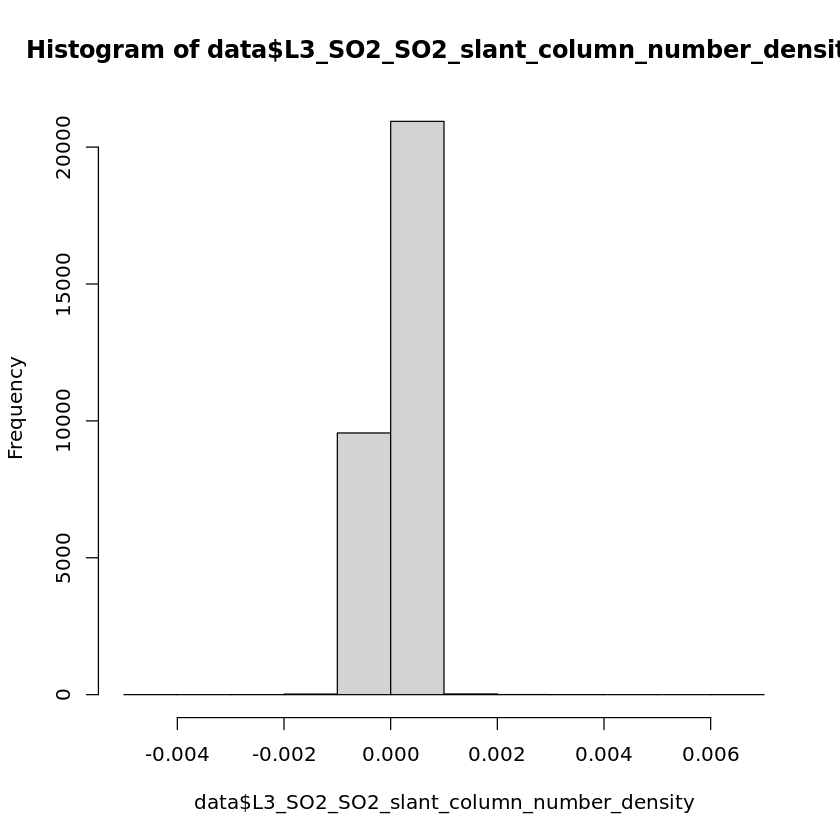

In [19]:
sd(data$L3_SO2_SO2_slant_column_number_density)
hist(data$L3_SO2_SO2_slant_column_number_density)

[1] 33.13094

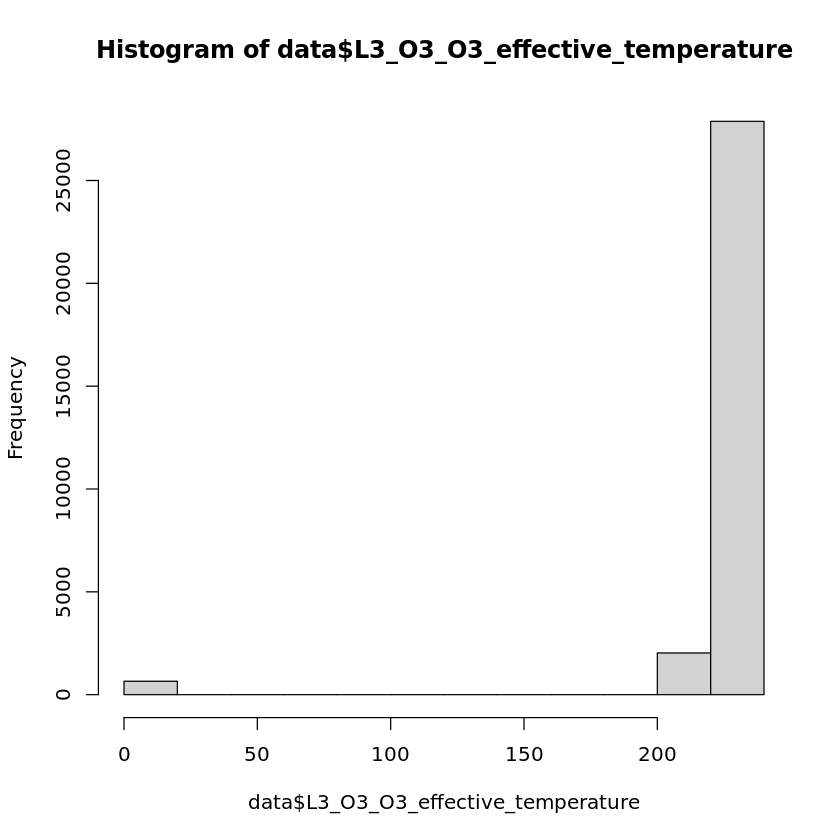

In [20]:
sd(data$L3_O3_O3_effective_temperature)
hist(data$L3_O3_O3_effective_temperature)

We can see that more than 25000 rows share the same value. This feature is therefore not really useful. Let's discard it.

In [21]:
data <- subset(data, select = -c(L3_O3_O3_effective_temperature))

In [22]:
#Visualize the few first rows of the data
head(data)

,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,⋯,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,month,day
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,38,11.000000,60.2,0.00804000,18.51684,1.996377,-1.2273949,0.0001558203,-1.2313303,0.006506796,⋯,0.3125208,-4.046582e-05,-1.8614757,0.00000000,76.53643,38.5930174,-61.75259,22.36366,1,2
2,39,14.600000,48.8,0.00839000,22.54653,3.330430,-1.1881078,0.0001968663,-1.0825535,0.018360030,⋯,0.4339572,5.021103e-05,-1.4526119,0.05943286,-14.70804,59.6249116,-67.69351,28.61480,1,3
3,24,16.400000,33.4,0.00750000,27.03103,5.065727,3.5005591,0.0001704180,-1.0012421,0.015903901,⋯,0.3569246,5.294885e-05,-1.5729503,0.08206301,-105.20134,49.8397137,-78.34270,34.29698,1,4
4,49,6.911948,21.3,0.00391000,23.97186,3.004001,1.0994678,0.0001748593,-0.7770191,0.055765467,⋯,0.5845225,1.097052e-04,-1.2393168,0.12126134,-104.33407,29.1812580,-73.89659,30.54545,1,5
5,21,13.900001,44.7,0.00535000,16.81631,2.621787,2.6705589,0.0001415511,0.3663234,0.028529577,⋯,0.4080472,1.589104e-04,0.2024888,0.03791943,58.85018,0.7972941,-68.61248,26.89969,1,6
6,28,14.600000,42.2,0.00586156,19.17489,2.955603,0.9690747,0.0001455166,-0.7253287,0.070249175,⋯,0.4411911,8.251524e-06,-0.9878199,0.06383604,76.38766,30.6051757,-62.13426,23.41999,1,7


To break the temporal dependance of the data, we shuffle the train dataset.

In [23]:

data <- data[sample(nrow(data)),]

Let's split the dataset in X (input) and Y (target).

In [24]:
# Build useful data to simplify the code
X <- data

X <- subset(X, select=-c(target))

Y <- data[, "target"]

N <- nrow(X)   

n <- ncol(X)

#### Apply the mimimum-Redundancy Maximum-Relevancy (mRMR) feature selection strategy

Let's rank the features with the mRMR algorithm to select the more useful columns.

In [25]:
CV_folds <- 10

size_CV <-floor(N/CV_folds)

CV_err<-matrix(0,nrow=n,ncol=CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-X[idx_ts,]  
    Y_ts<-Y[idx_ts]  
     
    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-X[idx_tr,]
    Y_tr<-Y[idx_tr]                          
    
    # Computing the mutual_info between input variables and output variable on the training set
    mutual_info <- -0.5 * log(1 - cor(X_tr,Y_tr)^2)
    
    # Initialization : No variables are selected and all the variables are candidates
    selected<-c()
    candidates<-1:n
    
    #mRMR ranks the variables by taking account not only the mutual_info with the output, but also by avoiding redudant variables
    for (j in 1:n) {
        redundancy_score<-numeric(length(candidates))
        
        if (length(selected)>0) {
            # Compute the mutual_info between the selected variables and the candidates on the training set
            mutual_info_selected_candidates <- -0.5 * log(1 - cor(X_tr[,selected,drop=F],X_tr[,candidates,drop=F])^2)
            # Compute the mean mutual_info for each candidate variable, across the selected variables
            redundancy_score<-apply(mutual_info_selected_candidates,2,mean)
        }
        
        # mRMR: minimum Redundancy Maximum Relevancy
        mRMR_score<-mutual_info[candidates]-redundancy_score
        
        # Select the candidate variable that maximises the mRMR score
        selected_current<-candidates[which.max(mRMR_score)]
        selected<-c(selected,selected_current)
        
        # Remove the selected variables from the candidates
        candidates<-setdiff(candidates,selected_current)
    }
    
    ranking <- selected
     
    for (nb_features in 1:n) {
        # Create a dataset including only the first nb_features selected variables
        DS<-cbind(X_tr[,ranking[1:nb_features],drop=F],target=Y_tr)
        
        # Model fit (using lm function)
        model<- lm(target~.,data = DS)
        
        # Model prediction
        Y_hat_ts<- predict(model,X_ts[,ranking[1:nb_features],drop=F])
        
        # Cross-validation error = MSE
        CV_err[nb_features,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))

 [1] "#Features:  1  ; CV error= 1939.0358  ; std dev= 110.2381" 
 [2] "#Features:  2  ; CV error= 1819.2093  ; std dev= 106.2054" 
 [3] "#Features:  3  ; CV error= 1712.5919  ; std dev= 103.5536" 
 [4] "#Features:  4  ; CV error= 1628.2875  ; std dev= 97.9821"  
 [5] "#Features:  5  ; CV error= 1601.855  ; std dev= 96.444"    
 [6] "#Features:  6  ; CV error= 1588.0527  ; std dev= 97.7078"  
 [7] "#Features:  7  ; CV error= 1580.7279  ; std dev= 95.1705"  
 [8] "#Features:  8  ; CV error= 1572.037  ; std dev= 94.8491"   
 [9] "#Features:  9  ; CV error= 1570.7301  ; std dev= 95.1934"  
[10] "#Features:  10  ; CV error= 1568.0615  ; std dev= 96.5391" 
[11] "#Features:  11  ; CV error= 1561.3474  ; std dev= 98.3671" 
[12] "#Features:  12  ; CV error= 1560.7958  ; std dev= 97.9756" 
[13] "#Features:  13  ; CV error= 1560.9832  ; std dev= 98.333"  
[14] "#Features:  14  ; CV error= 1560.92  ; std dev= 98.9762"   
[15] "#Features:  15  ; CV error= 1558.8904  ; std dev= 98.7531" 
[16] "#Fea

Let's observe the evolution of the CV error per feature.

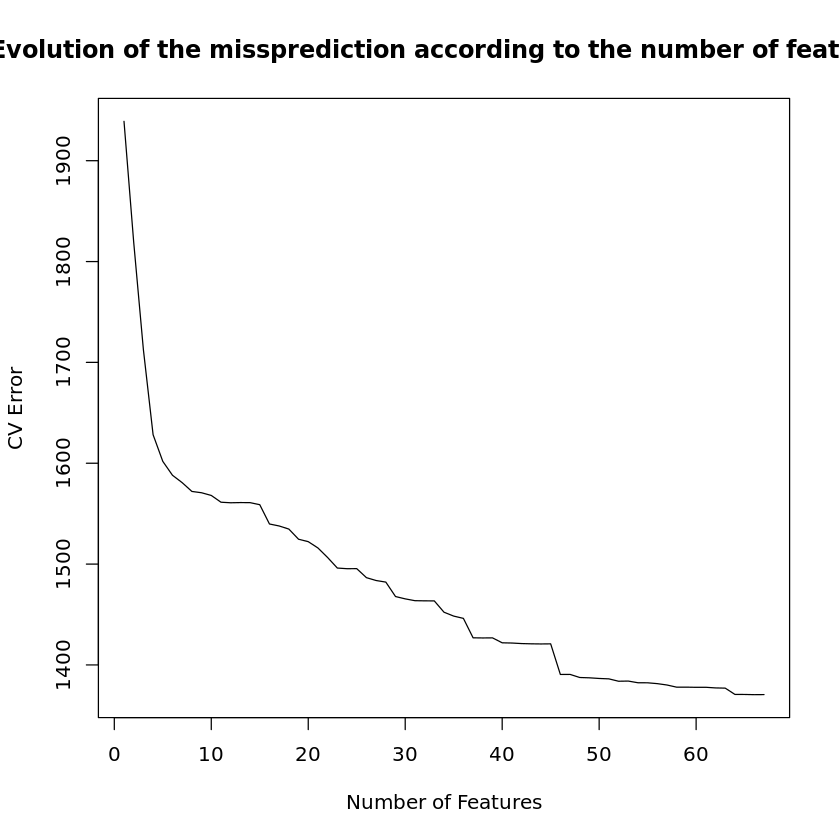

In [26]:
# Create a vector of integers from 1 to n, and assign it to the variable x_axis
x_axis <- c(1:n)

# Apply the mean function to each row of the CV_err matrix, round the result to 4 decimal places, and assign it to the variable CV_err_mean
CV_err_mean <- round(apply(CV_err,1,mean),digits=4)

# Plot the mean cross-validation error against the number of features
plot(x_axis,
CV_err_mean,
    type = "l", # Specify the type of plot as line plot
    xlab = "Number of Features", # Label for the x-axis
    ylab = "CV Error", # Label for the y-axis
    main = "Evolution of the missprediction according to the number of features") # Title of the plot

In [27]:
# Display the colummn names of the data frame X, to see the best features
selected
colnames(X)[selected]

[1] 24  7 38 52 60  5 43 66 45 59 55 67 11  2  6 39 26 17 29 32 50 18 64 15  9
[26] 25 51 58 33 30 27 57 34  1 13 12 56  8 42 16 28 40 36 35 10  4 61 65 53 22
[51] 54  3 19 31 62 14 21 41 48 63 37 20 23 44 47 49 46

[1] "L3_CO_CO_column_number_density"                     
 [2] "L3_NO2_NO2_slant_column_number_density"             
 [3] "L3_HCHO_tropospheric_HCHO_column_number_density"    
 [4] "L3_AER_AI_sensor_altitude"                          
 [5] "L3_SO2_absorbing_aerosol_index"                     
 [6] "u_component_of_wind_10m_above_ground"               
 [7] "L3_CLOUD_cloud_optical_depth"                       
 [8] "month"                                              
 [9] "L3_CLOUD_cloud_top_pressure"                        
[10] "L3_SO2_SO2_slant_column_number_density"             
[11] "L3_AER_AI_solar_azimuth_angle"                      
[12] "day"                                                
[13] "L3_NO2_sensor_azimuth_angle"                        
[14] "relative_humidity_2m_above_ground"                  
[15] "v_component_of_wind_10m_above_ground"               
[16] "L3_HCHO_tropospheric_HCHO_column_number_density_amf"
[17] "L3_CO_cloud_height"                                 
[18] "L3_NO2_tropospheric_NO2_column_number_density"      
[19] "L3_CO_sensor_zenith_angle"                          
[20] "L3_HCHO_HCHO_slant_column_number_density"           
[21] "L3_CLOUD_surface_albedo"                            
[22] "L3_O3_O3_column_number_density"                     
[23] "L3_SO2_solar_azimuth_angle"                         
[24] "L3_NO2_stratospheric_NO2_column_number_density"     
[25] "L3_NO2_cloud_fraction"                              
[26] "L3_CO_H2O_column_number_density"                    
[27] "L3_AER_AI_absorbing_aerosol_index"                  
[28] "L3_SO2_SO2_column_number_density_amf"               
[29] "L3_HCHO_cloud_fraction"                             
[30] "L3_CO_solar_azimuth_angle"                          
[31] "L3_CO_sensor_altitude"                              
[32] "L3_SO2_SO2_column_number_density"                   
[33] "L3_HCHO_sensor_azimuth_angle"                       
[34] "precipitable_water_entire_atmosphere"               
[35] "L3_NO2_solar_azimuth_angle"                         
[36] "L3_NO2_sensor_zenith_angle"                         
[37] "L3_AER_AI_solar_zenith_angle"                       
[38] "L3_NO2_absorbing_aerosol_index"                     
[39] "L3_CLOUD_cloud_fraction"                            
[40] "L3_NO2_tropopause_pressure"                         
[41] "L3_CO_sensor_azimuth_angle"                         
[42] "L3_CLOUD_cloud_base_height"                         
[43] "L3_HCHO_solar_azimuth_angle"                        
[44] "L3_HCHO_sensor_zenith_angle"                        
[45] "L3_NO2_sensor_altitude"                             
[46] "temperature_2m_above_ground"                        
[47] "L3_SO2_cloud_fraction"                              
[48] "L3_SO2_solar_zenith_angle"                          
[49] "L3_AER_AI_sensor_azimuth_angle"                     
[50] "L3_O3_solar_azimuth_angle"                          
[51] "L3_AER_AI_sensor_zenith_angle"                      
[52] "specific_humidity_2m_above_ground"                  
[53] "L3_O3_cloud_fraction"                               
[54] "L3_CO_solar_zenith_angle"                           
[55] "L3_SO2_sensor_azimuth_angle"                        
[56] "L3_NO2_solar_zenith_angle"                          
[57] "L3_O3_sensor_zenith_angle"                          
[58] "L3_CLOUD_cloud_base_pressure"                       
[59] "L3_CLOUD_solar_azimuth_angle"                       
[60] "L3_SO2_sensor_zenith_angle"                         
[61] "L3_HCHO_solar_zenith_angle"                         
[62] "L3_O3_sensor_azimuth_angle"                         
[63] "L3_O3_solar_zenith_angle"                           
[64] "L3_CLOUD_cloud_top_height"                          
[65] "L3_CLOUD_sensor_zenith_angle"                       
[66] "L3_CLOUD_solar_zenith_angle"                        
[67] "L3_CLOUD_sensor_azimuth_angle"

The improvement of the CV error is very small after the 46 first colums. So, we will keep only them.

In [28]:
#Keep only the 46 first selected features

X<-X[,selected[1:46],drop=F]

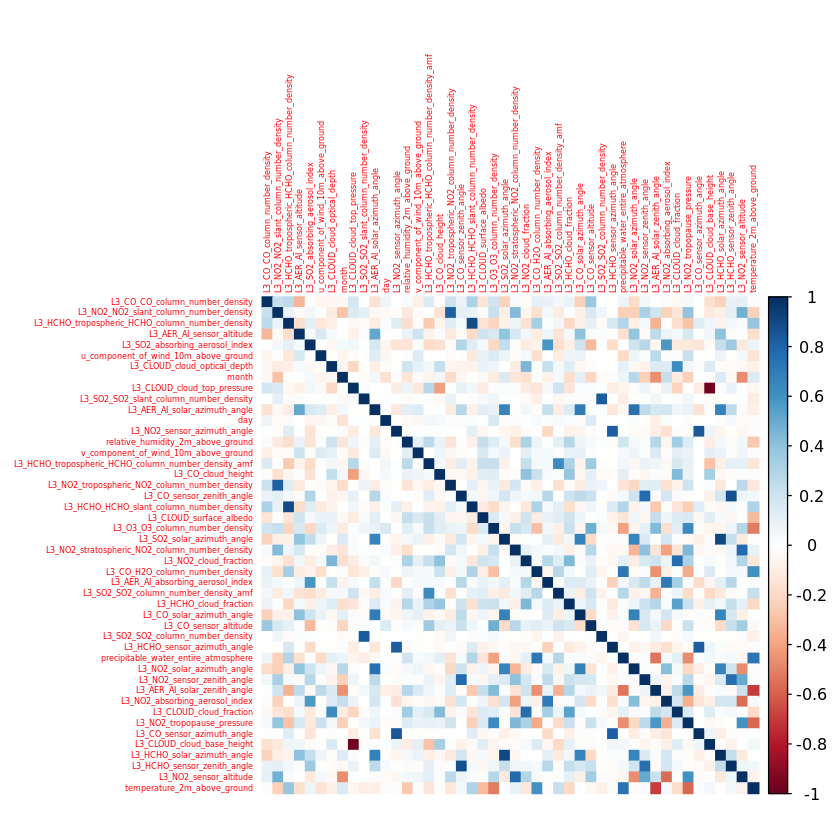

In [29]:
# Compute the correlation matrix for the dataset X and assign it to the variable 'correlations'
correlations <- cor(X)

corrplot(correlations, method = "color", tl.cex = 0.4)

#### Apply PCA

https://www.geo.fu-berlin.de/en/v/soga-py/Advanced-statistics/Multivariate-Approaches/Principal-Component-Analysis/PCA-the-basics/Choose-Principal-Components/index.html#:~:text=A%20widely%20applied%20approach%20is,elbow%20in%20the%20scree%20plot.

Apply the Principal Component Analysis (PCA) to the dataset X <br/>
The 'rank = 46' argument specifies the maximum number of principal components to be computed

In [30]:
pca_features <- prcomp(X, scale = TRUE, rank = 46)

Display the summary of the pca_features

In [31]:
summary(pca_features)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.3130 2.2856 1.95375 1.89140 1.71822 1.58846 1.53145
Proportion of Variance 0.1163 0.1136 0.08298 0.07777 0.06418 0.05485 0.05099
Cumulative Proportion  0.1163 0.2299 0.31284 0.39061 0.45479 0.50964 0.56063
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.35287 1.30255 1.26480 1.15544 1.12968 1.08446 1.03833
Proportion of Variance 0.03979 0.03688 0.03478 0.02902 0.02774 0.02557 0.02344
Cumulative Proportion  0.60042 0.63730 0.67208 0.70110 0.72884 0.75441 0.77785
                          PC15    PC16    PC17    PC18    PC19   PC20    PC21
Standard deviation     0.96855 0.92801 0.90033 0.89187 0.84306 0.8307 0.72941
Proportion of Variance 0.02039 0.01872 0.01762 0.01729 0.01545 0.0150 0.01157
Cumulative Proportion  0.79824 0.81696 0.83458 0.85188 0.86733 0.8823 0.89389
                          PC22    PC23

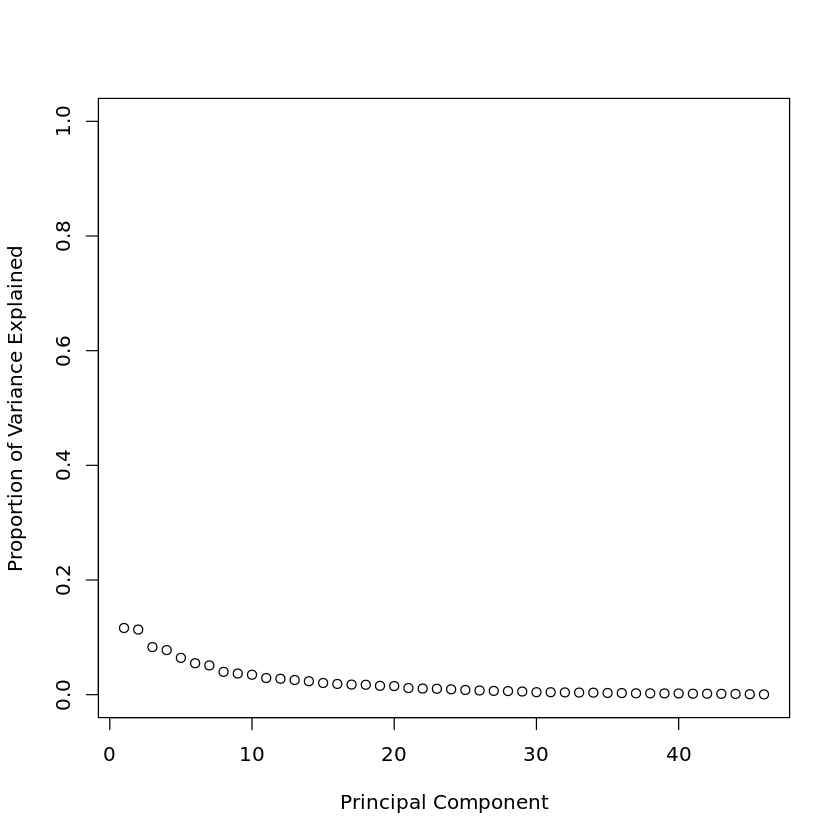

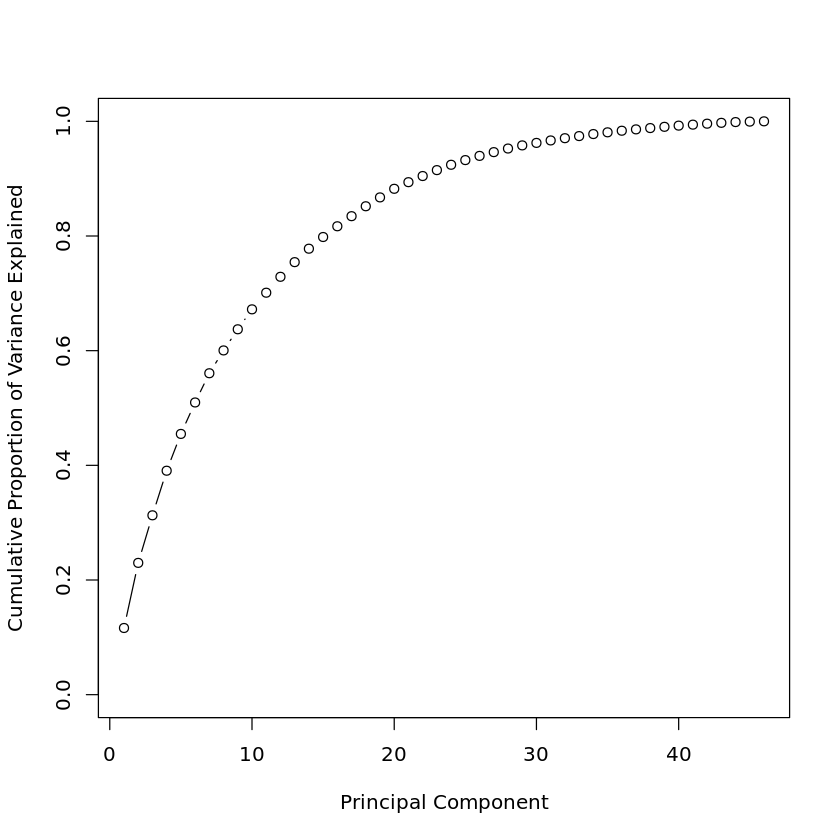

In [32]:
#plot standard deviation of the principal components ,cumulative proportion of variance explained
plot(pca_features$sdev^2/sum(pca_features$sdev^2), xlab = "Principal Component", ylab = "Proportion of Variance Explained", ylim = c(0,1), type = "b")

plot(cumsum(pca_features$sdev^2/sum(pca_features$sdev^2)), xlab = "Principal Component", ylab = "Cumulative Proportion of Variance Explained", ylim = c(0,1), type = "b")



### pre-processing of the test dataset

In [33]:
# Aplly the same method done on the training set to the test set without display it
data_test <- subset(data_test,select = -c(Place_ID.X.Date,Place_ID))


date_values <- t(apply(data_test, 1, label_date))


data_test$month <- date_values[, 2]
data_test$day <- date_values[, 3]


data_test <- subset(x=data_test, select=-c(Date))


data_test <- data.frame(apply(data_test, 2, replace_na_with_mean_value))

colonnes_communes <- intersect(names(X), names(data_test))

data_test_subset <- data_test[, colonnes_communes]


#### Create dataset (train, validation , test)

In [34]:
#Apply the PCA transformation to the dataset X and the test dataset
X_pca <- predict(pca_features, X)
X_test <- predict(pca_features, data_test)

#keep 80% of lines for train dataset and 20 for validation dataset

X_train <- X_pca[1:round(0.8*nrow(X_pca)),]
Y_train <- Y[1:round(0.8*nrow(X_pca))]
X_val <- X_pca[(round(0.8*nrow(X_pca))+1):nrow(X_pca),]
Y_val <- Y[(round(0.8*nrow(X_pca))+1):nrow(X_pca)]


## Models implementation

### Random Forest

In [35]:

rf_model <- randomForest(x = X_train, y = Y_train, ntree = 100)

predictions <- predict(rf_model, X_val)


rmse <- sqrt(mean((predictions - Y_val)^2))


nmse <- mean((predictions - Y_val)^2) / mean((Y_val - mean(Y_val))^2)

print(paste("RMSE on the validation set:", rmse))
print(paste("NMSE on the validation set:", nmse))

[1] "RMSE on the validation set: 36.7729243166915"
[1] "NMSE on the validation set: 0.566928957235856"


### Neural Networks

In [37]:
# Building a neural network model using Keras with 3 hidden layers 
# and dropout regularization due to the overfitting show on curves

input_size <- ncol(X_train)
hidden_layer1_size <- 50
hidden_layer2_size <- 30
hidden_layer3_size <- 10
output_size <- 1
dropout_rate <- 0.1


nn_model <- keras_model_sequential() %>%
  layer_dense(units = hidden_layer1_size, activation = 'relu', input_shape = c(input_size)) %>%

  layer_dropout(rate = dropout_rate) %>%

  layer_dense(units = hidden_layer2_size, activation = 'relu') %>%

  layer_dropout(rate = dropout_rate) %>%

  layer_dense(units = hidden_layer3_size, activation = 'relu') %>%

  layer_dropout(rate = dropout_rate) %>%

  layer_dense(units = output_size)

# Compile the model with mean squared error as the loss function, Adam optimizer, and mean squared error as the metric
nn_model %>% compile(
  loss = 'mean_squared_error',
  optimizer = optimizer_adam(),
  metrics = c('mean_squared_error')
)

# Train the model on the training data for 200 epochs with a batch size of 32, and validate on the validation data
history <- nn_model %>% fit(
  X_train, Y_train,
  epochs = 100,
  batch_size = 32,
  validation_data = list(X_val, Y_val)
)

# Use the trained model to make predictions on the validation data
predictions <- nn_model %>% predict(X_val)


rmse <- sqrt(mean((predictions - Y_val)^2))

nmse <- mean((predictions - Y_val)^2) / mean((Y_val - mean(Y_val))^2)

print(paste("RMSE on the validation set:", rmse))
print(paste("NMSE on the validation set:", nmse))

[1] "RMSE on the validation set: 34.2706327965974"
[1] "NMSE on the validation set: 0.492398307601992"


Let's see the evolution of the loss of the training and the test dataset.

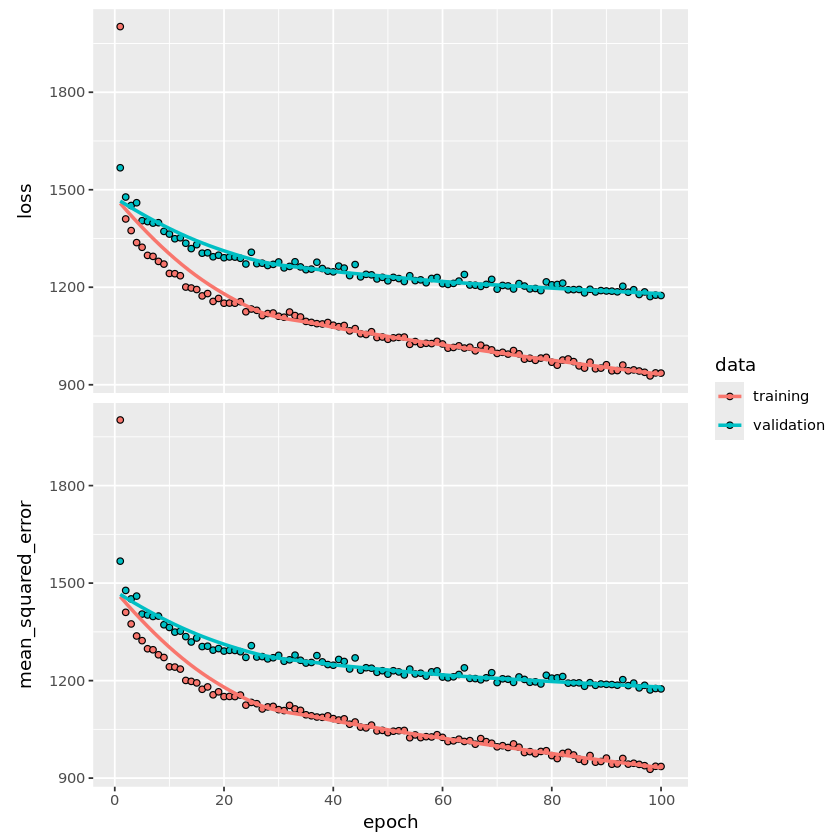

In [38]:
plot(history)

### Lazy Model

Application of the lazy model. The number of selected columns and the values of parameters in lazy.controls were determined after many trials.

In [40]:
X_train_lazy <- data.frame(X_train[,1:28])
X_train_lazy["target"] = Y_train

X_train_lazy.lazy <- lazy(target ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + PC11 + PC12 + PC13 + PC14 + PC15 + PC16 + PC17 + PC18 
+ PC19 + PC20 + PC21 + PC22 + PC23 + PC24 + PC25 + PC26 + PC27 + PC28,
data = X_train_lazy, control = lazy.control(linIdPar = 2))

pred_lazy <- predict(X_train_lazy.lazy, X_val)
predictions.la <- pred_lazy$h

rmse <- sqrt(mean((predictions.la - Y_val)^2))
nmse <- mean((predictions.la - Y_val)^2) / mean((Y_val - mean(Y_val))^2)

print(paste("RMSE sur l'ensemble de validation:", rmse))
print(paste("NMSE sur l'ensemble de validation:", nmse))

[1] "RMSE sur l'ensemble de validation: 36.7659575821904"
[1] "NMSE sur l'ensemble de validation: 0.566714164995977"


### XGBoost

[1]	train-rmse:73.296744	validation-rmse:75.596800 
Multiple eval metrics are present. Will use validation_rmse for early stopping.
Will train until validation_rmse hasn't improved in 50 rounds.

[101]	train-rmse:23.244147	validation-rmse:36.177253 
[201]	train-rmse:18.339388	validation-rmse:35.327374 
[301]	train-rmse:15.128949	validation-rmse:34.926061 
[401]	train-rmse:12.647656	validation-rmse:34.703089 
[501]	train-rmse:10.599830	validation-rmse:34.534590 
[601]	train-rmse:9.054058	validation-rmse:34.442565 
[701]	train-rmse:7.749287	validation-rmse:34.385251 
[801]	train-rmse:6.677976	validation-rmse:34.342921 
[901]	train-rmse:5.779411	validation-rmse:34.314174 
[1001]	train-rmse:5.011333	validation-rmse:34.290283 
[1101]	train-rmse:4.342323	validation-rmse:34.264515 
[1201]	train-rmse:3.728503	validation-rmse:34.244471 
[1301]	train-rmse:3.260625	validation-rmse:34.228014 
[1401]	train-rmse:2.835117	validation-rmse:34.213194 
[1500]	train-rmse:2.489108	validation-rmse:34.207793

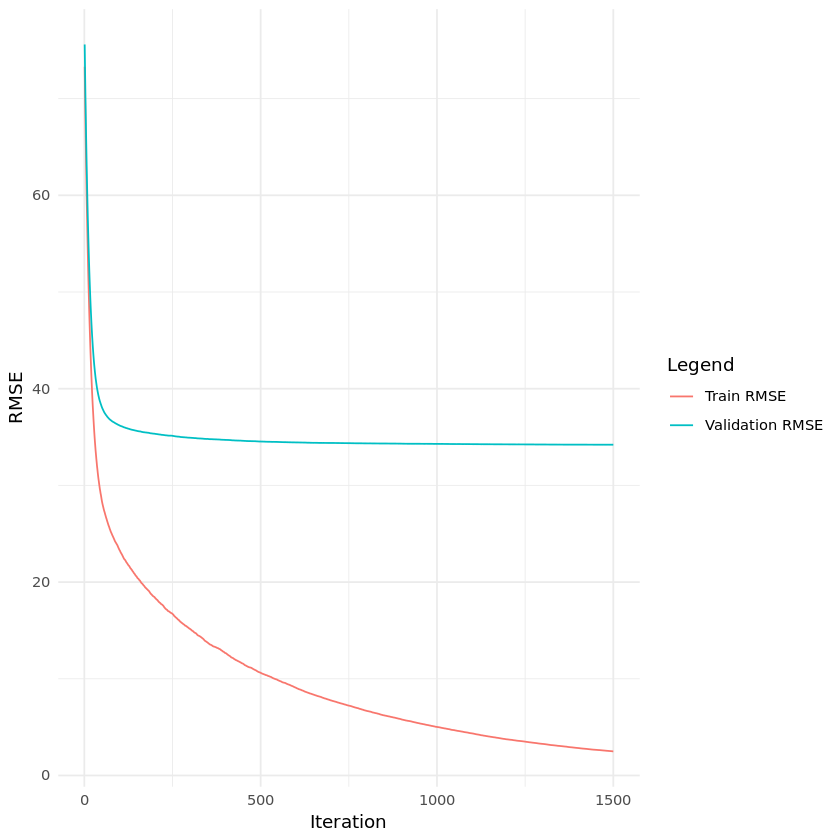

In [48]:
# Define parameters of the XGBoost model
params <- list(
  objective = "reg:squarederror",
  eval_metric = "rmse",
  min_child_weight = 1,
  eta = 0.05,
  nthread = -1,
  max_depth = 8,
  subsample = 0.9,
  colsample_bytree = 0.9
)
# Create the DMatrix objects for the train, validation, and test datasets
train_dataset <- xgb.DMatrix(data = X_train, label = Y_train)
val_dataset <- xgb.DMatrix(data = X_val, label = Y_val)
test_dataset <- xgb.DMatrix(data = X_test)
watchlist <- list(train = train_dataset, validation = val_dataset)
 
 
# Train the XGBoost model
model <- xgb.train(
  params = params,
  data = train_dataset,
  nrounds = 1500,
  watchlist = watchlist,
  early_stopping_rounds = 50,
  print_every_n = 100
)
eval_log <- model$evaluation_log
 
# Plot the training and validation RMSE into curves
library(ggplot2)
ggplot(eval_log, aes(x = iter)) +
  geom_line(aes(y = train_rmse, colour = "Train RMSE")) +
  geom_line(aes(y = validation_rmse, colour = "Validation RMSE")) +
  labs(x = "Iteration", y = "RMSE", colour = "Legend") +
  theme_minimal()
 

In [ ]:
# Creation of the submission file with the predictions of the XGBoost model
predictions <- predict(model, X_test)


submission <- data.frame(Place_ID.X.Date = data_test_copy$Place_ID.X.Date, target = predictions)


write.csv(submission, file = "data/predictions_xgboost.csv", row.names = FALSE, quote = FALSE)


## Predictive power of the 10 most relevant features

The conditional entropy is approximated by cross-validation error

We select the best of our 4 models, so XGBoost. <br/>
To reduce the computation time, we decrease the number of rounds. We assume that if there is an impact on the feature ranking, it is very small.

In [49]:
model_xgboost <- function(X_train, Y_train, X_test, Y_test){
  # xgboost need matrix instead of data frame
  X_train <- as.matrix(X_train)
  X_test <- as.matrix(X_test)
  # Define parameters of the XGBoost model
  params <- list(
    objective = "reg:squarederror",
    eval_metric = "rmse",
    min_child_weight = 1,
    eta = 0.05,
    nthread = -1,
    max_depth = 8,
    subsample = 0.9,
    colsample_bytree = 0.9
  )
  # Create the DMatrix objects for the train, validation, and test datasets
  train_dataset <- xgb.DMatrix(data = X_train, label = Y_train)
  val_dataset <- xgb.DMatrix(data = X_test, label = Y_test)
  test_dataset <- xgb.DMatrix(data = X_test)
  watchlist <- list(train = train_dataset, validation = val_dataset)
  
  
  # Train the XGBoost model
  model <- xgb.train(
    params = params,
    data = train_dataset,
    nrounds = 300,
    watchlist = watchlist,
    early_stopping_rounds = 50,
    verbose = 0,
    print_every_n = 50
  )
  predictions <- predict(model, newdata = test_dataset)
  out <- sqrt(mean((predictions - Y_test)^2))
  return(out)
}

We select the 10 relevant features from the mRMR results.

In [50]:
X <- data.frame(X[,1:10]) # 10 most relevant features
colnames(X)

[1] "L3_CO_CO_column_number_density"                 
 [2] "L3_NO2_NO2_slant_column_number_density"         
 [3] "L3_HCHO_tropospheric_HCHO_column_number_density"
 [4] "L3_AER_AI_sensor_altitude"                      
 [5] "L3_SO2_absorbing_aerosol_index"                 
 [6] "u_component_of_wind_10m_above_ground"           
 [7] "L3_CLOUD_cloud_optical_depth"                   
 [8] "month"                                          
 [9] "L3_CLOUD_cloud_top_pressure"                    
[10] "L3_SO2_SO2_slant_column_number_density"

The crossvalidation error is computed with a k-fold (k=5) cross validation with B(=3) repetitions.

In [51]:
ppf <- array(data=NA, dim=10)

# compute estimation of H(Y|X)
cv.out <- crossval(model_xgboost, X, Y, K=5, B=3, verbose=FALSE)
H_Y_X <- cv.out$stat.se
print(paste0("H(Y|X) = ", H_Y_X))

for (i in 1:10){
  X_i = X[, c(-i)]
  # compute estimation of H(Y|X-i)
  cv.out <- crossval(model_xgboost, X_i, Y, K=5, B=3, verbose=FALSE)
  H_Y_Xi <- cv.out$stat.se
  print(paste0("H(Y|X-", i, ") = ", H_Y_Xi))
  # Compute estimation of I(xi;Y|X-i) = H(y|X-i) - H(Y|X)
  I_xi_Y_Xi <- H_Y_Xi - H_Y_X
  print(paste0("Predictive power of feature ", i, ": ", I_xi_Y_Xi))
  ppf[i] <- I_xi_Y_Xi
}

[1] "H(Y|X) = 0.330022258880158"
[1] "H(Y|X-1) = 0.43129157839457"
[1] "Predictive power of feature 1: 0.101269319514412"
[1] "H(Y|X-2) = 0.287520557409401"
[1] "Predictive power of feature 2: -0.0425017014707574"
[1] "H(Y|X-3) = 0.36796903586575"
[1] "Predictive power of feature 3: 0.0379467769855918"
[1] "H(Y|X-4) = 0.37055102321545"
[1] "Predictive power of feature 4: 0.0405287643352915"
[1] "H(Y|X-5) = 0.332647002918215"
[1] "Predictive power of feature 5: 0.00262474403805685"
[1] "H(Y|X-6) = 0.32591947481018"
[1] "Predictive power of feature 6: -0.00410278406997816"
[1] "H(Y|X-7) = 0.327689003932561"
[1] "Predictive power of feature 7: -0.00233325494759723"
[1] "H(Y|X-8) = 0.343525297235777"
[1] "Predictive power of feature 8: 0.0135030383556194"
[1] "H(Y|X-9) = 0.275913415457086"
[1] "Predictive power of feature 9: -0.0541088434230721"
[1] "H(Y|X-10) = 0.288609339456055"
[1] "Predictive power of feature 10: -0.0414129194241026"


### Ranking

- L3_CO_CO_column_number_density
- L3_AER_AI_sensor_altitude
- L3_HCHO_tropospheric_HCHO_column_number_density
- month
- L3_SO2_absorbing_aerosol_index

 <br/> 
 
- L3_CLOUD_cloud_optical_depth
- u_component_of_wind_10m_above_ground
- L3_SO2_SO2_slant_column_number_density
- L3_NO2_NO2_slant_column_number_density
- L3_CLOUD_cloud_top_pressure